In [16]:
import numpy as np
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

In [2]:
ds = xr.open_mfdataset('/home/scratch/ahaberlie/AFWA_HAIL/HIST/*/HAIL_MAX2D_historical_*.nc')

In [11]:
#ds

In [12]:
coords = xr.open_dataset('lat_lon.nc')

In [13]:
lats = coords.CLAT.values[0, :, :]
lons = coords.CLONG.values[0, :, :]

In [14]:
lats.shape

(899, 1399)

In [4]:
hail = ds.HAIL_MAX2D * 39.3701

In [5]:
over_inch = xr.where(hail >= 1, 1, 0)
#over_inch
sev_hail_day = over_inch.resample(Time = '1D').max()
sev_hail_day

<xarray.DataArray 'HAIL_MAX2D' (Time: 5479, south_north: 899, west_east: 1399)>
dask.array<where, shape=(5479, 899, 1399), dtype=float64, chunksize=(3, 899, 1399), chunktype=numpy.ndarray>
Coordinates:
  * Time     (Time) datetime64[ns] 1990-10-01 1990-10-02 ... 2005-09-30
Dimensions without coordinates: south_north, west_east

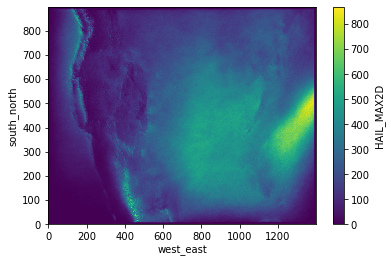

In [6]:
sev_hail_day = sev_hail_day.sum(dim = 'Time').plot()

In [7]:
sev_hail_conus = sev_hail_day.sum(dim = 'Time')

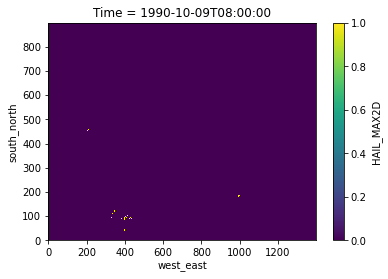

In [41]:
over_inch[200].plot()

In [29]:
years = over_inch.groupby('Time.year')

In [45]:
years

DataArrayGroupBy, grouped over 'year'
16 groups with labels 1990, 1991, 1992, ..., 2004, 2005.

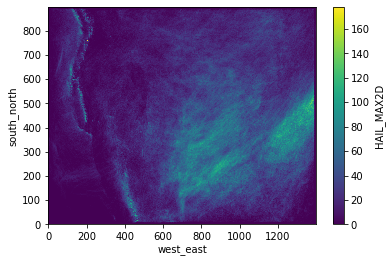

In [32]:
years[1991].sum(dim = 'Time').plot()

/anaconda3/envs/pyEAE/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)


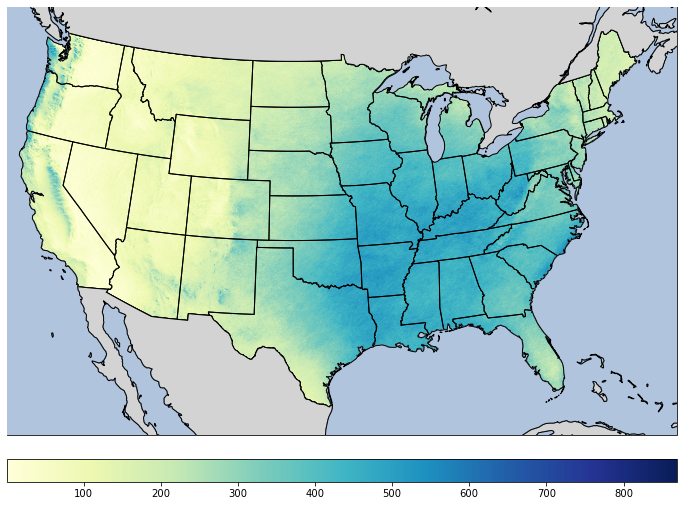

In [19]:
fig = plt.figure(figsize= (12,8)) #Plot a figure
gs1 = gridspec.GridSpec(2, 1, height_ratios=[1, .05], bottom=.05, top=.95, wspace=.1)
map_proj = ccrs.LambertConformal(central_longitude = -100, central_latitude = 35) #Set projection, central lat/lon
ax = plt.subplot(projection = map_proj)
#ax.set_title('Maximum diameter hail for 2005', fontsize = 22)
ax.add_feature(cfeature.LAND.with_scale('10m')) #Add land
countries_shp = shpreader.natural_earth(resolution='50m',
                                     category='cultural',
                                     name='admin_0_countries')
for country, info in zip(shpreader.Reader(countries_shp).geometries(), 
                             shpreader.Reader(countries_shp).records()):
        if info.attributes['NAME_LONG'] != 'United States':

            ax.add_geometries([country], ccrs.PlateCarree(),
                             facecolor='lightgrey', edgecolor='k', zorder=6)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'coastline', '50m', edgecolor='k', 
                                                facecolor='None'), zorder=8) 
ax.add_feature(cfeature.BORDERS.with_scale('10m')) #Add state borders
ax.add_feature(cfeature.STATES.with_scale('10m'), facecolor = 'none') #Add US states
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='face', 
                                                facecolor='lightsteelblue'), zorder=6)
lakes_shp = shpreader.natural_earth(resolution='50m',
                                     category='physical',
                                     name='lakes')
for lake, info in zip(shpreader.Reader(lakes_shp).geometries(), 
                             shpreader.Reader(lakes_shp).records()):
        name = info.attributes['name']
        if name == 'Lake Superior' or name == 'Lake Michigan' or \
           name == 'Lake Huron' or name == 'Lake Erie' or name == 'Lake Ontario':
            
            ax.add_geometries([lake], ccrs.PlateCarree(),
                             facecolor='lightsteelblue', edgecolor='k', zorder=6)
ax.set_extent([240,287,22,50]) #Set lat/lon boundaries
lrFig = ax.pcolormesh(lons, lats, sev_hail_conus, cmap = 'YlGnBu', vmin = 1, transform = ccrs.PlateCarree())
ax1 = plt.subplot(gs1[1, 0])
cb = plt.colorbar(lrFig, cax = ax1, orientation = 'horizontal')
plt.savefig('/home/scratch/jgoodin/sev_hail_day_climos/hist_sev_hail_day_climo.png')

In [8]:
#day_of_year_max = years.groupby('Time.dayofyear')
#day_of_year_max

In [9]:
#year2[200].max(dim = 'Time').plot()

In [19]:
#year2_sum = year2.sum('Time')

In [10]:
#year2_sum